In [206]:
import torch
import matplotlib.pyplot as plt
from deepymod_torch.model.func_approx import Siren, SineLayer
from math import pi
import numpy as np

In [52]:
x = torch.linspace(-1, 1, 100)[:, None]
x.requires_grad=True

In [232]:
# Configuring model
network = Siren(1, 30, 1, 1, outermost_linear=True)

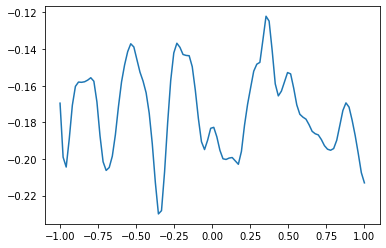

In [233]:
plt.plot(x.detach(), network(x).detach())

In [234]:
params = list(network.state_dict().items())
n = len(params)
w0 = 30

In [235]:
network

Siren(
  (net): Sequential(
    (0): SineLayer(
      (linear): Linear(in_features=1, out_features=30, bias=True)
    )
    (1): SineLayer(
      (linear): Linear(in_features=30, out_features=30, bias=True)
    )
    (2): Linear(in_features=30, out_features=1, bias=True)
  )
)

In [242]:
# Calculating output
output = x.clone()
for idx in np.arange(0, (n-2), 2):
    output = torch.sin(w0 * (output @ params[idx][1].T + params[idx+1][1]))
output = output @ params[-2][1].T + params[-1][1] # last layer

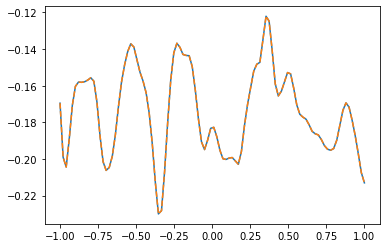

In [243]:
plt.plot(x.detach(), output.cpu().detach().numpy())
plt.plot(x.detach(), network(x).detach(), '--')

In [244]:
dt = torch.autograd.grad(output, x, grad_outputs=torch.ones_like(output))[0].cpu().detach().numpy()

So that works. Now let's try the derivative w.r.t x:

In [245]:
params = list(network.state_dict().items())
n = len(params)
w0 = 30

In [246]:
for idx in np.arange(0, (n-2), 2):
    print(idx)

0
2


In [280]:
y0 = w0 * torch.sin(w0 * (x.clone() @ params[0][1].T + params[1][1] + pi / 2)) * torch.diag(params[0][1])

In [282]:
y1 = w0 * torch.sin(w0 * y0 @ params[2][1].T + params[3][1] + pi/2) * torch.diag(params[2][1])

In [283]:
y2 = y1 @ params[4][1].T

In [287]:
dt_siren = y2.cpu().detach().numpy()

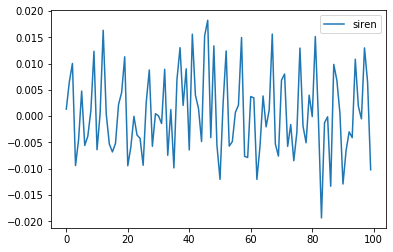

In [289]:
plt.plot(dt_siren, label='siren')
#plt.plot(dt, label='autograd')
plt.legend()

# SIne layer

In [216]:
model = SineLayer(1, 5)

In [217]:
model.state_dict().items()

odict_items([('linear.weight', tensor([[-0.0220],
        [ 0.0537],
        [ 0.0328],
        [ 0.0289],
        [ 0.0524]])), ('linear.bias', tensor([ 0.9411,  0.5965, -0.2990,  0.1257,  0.1589]))])

In [226]:
params = list(model.state_dict().items())
n = len(params)
w0 = 30

In [228]:
y = torch.sin(x.clone() @ params[0][1].T + params[1][1])

In [230]:
params[0][1].shape

torch.Size([5, 1])

In [231]:
w0 * torch.sin(x.clone() @ params[0][1].T + params[1][1] + pi / 2)

tensor([[17.1308, 25.6884, 28.3646, 29.8594, 29.8300],
        [17.1417, 25.6716, 28.3711, 29.8577, 29.8266],
        [17.1526, 25.6547, 28.3775, 29.8560, 29.8232],
        [17.1635, 25.6378, 28.3840, 29.8543, 29.8197],
        [17.1745, 25.6209, 28.3904, 29.8526, 29.8162],
        [17.1854, 25.6039, 28.3968, 29.8508, 29.8127],
        [17.1963, 25.5869, 28.4032, 29.8491, 29.8091],
        [17.2072, 25.5699, 28.4096, 29.8473, 29.8055],
        [17.2181, 25.5529, 28.4160, 29.8456, 29.8019],
        [17.2290, 25.5358, 28.4223, 29.8438, 29.7982],
        [17.2399, 25.5187, 28.4287, 29.8420, 29.7945],
        [17.2508, 25.5016, 28.4350, 29.8402, 29.7908],
        [17.2617, 25.4844, 28.4413, 29.8384, 29.7871],
        [17.2726, 25.4672, 28.4476, 29.8366, 29.7833],
        [17.2834, 25.4500, 28.4539, 29.8347, 29.7794],
        [17.2943, 25.4327, 28.4602, 29.8329, 29.7756],
        [17.3052, 25.4154, 28.4665, 29.8311, 29.7717],
        [17.3161, 25.3981, 28.4727, 29.8292, 29.7678],
        [1